# Text Analysis
Reference: 
http://www.cs.duke.edu/courses/spring14/compsci290/assignments/lab02.html

http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html#b-creating-the-word-cloud-b-creating-the-word-cloud


http://www.nltk.org/book/ch03.html


### Introduction
In this notebook, we will use the following steps to analyze text:

* Read the text document
* Tokenize the text
* Remove Punctuations
* Calulate the term frequency in the text
* Generate a word cloud from the book chapters

### Before Starting

If you have not already, from terminal, run `pip install data science` to download python's Data Science package.

Also, run the command `pip install git+git://github.com/amueller/word_cloud.git` on terminal

In [56]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

from nltk import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
import string
nltk.download('punkt')

from urllib.request import urlopen 
import re                                                                                                                
def read_url(url): 
    return re.sub('\\s+', ' ', urlopen(url).read().decode())

[nltk_data] Downloading package punkt to /Users/gm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Reading data from the Web

We will now read text from a text file via the url:

In [57]:
little_women_url = 'http://www.gutenberg.org/cache/epub/35534/pg35534.txt'
little_women_text = read_url(little_women_url)
chapters = little_women_text.split('CHAPTER ')[1:]

Question, could you make the program read the data from disk?

Answer Here

In [58]:
#This prints the first 1000 words of the book
little_women_text[:1000]

'\ufeffProject Gutenberg\'s How to be Happy Though Married, by Edward John Hardy This eBook is for the use of anyone anywhere at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org Title: How to be Happy Though Married Being a Handbook to Marriage Author: Edward John Hardy Release Date: March 9, 2011 [EBook #35534] Language: English *** START OF THIS PROJECT GUTENBERG EBOOK HOW TO BE HAPPY THOUGH MARRIED *** Produced by Colin Bell, Christine P. Travers and the Online Distributed Proofreading Team at http://www.pgdp.net (This file was produced from images generously made available by The Internet Archive) [Transcriber\'s note: The author\'s spelling has been maintained. + signs around words indicate the use of a different font in the book. In the word "Puranic", the "a" is overlined in the book.] _HOW TO BE HAPPY THOUGH MARRIED._ PRESS NOTIC

## Tokenization

Here we first convert the text into lower case and then turn into a list of words and punctuations.

In [90]:
# from nltk import word_tokenize
import string
import nltk
nltk.download('punkt')
little_women_text_lower= little_women_text.lower()
tokens= nltk.word_tokenize(little_women_text_lower)
tokens[:10] #first 10 elements (words) of the list (text)


[nltk_data] Downloading package punkt to /Users/gm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['\ufeffproject',
 'gutenberg',
 "'s",
 'how',
 'to',
 'be',
 'happy',
 'though',
 'married',
 ',']

Now, we'll remove the punctions from the tokened list to avoid skewed results.

In [94]:
tokens= [''.join(c for c in tokens if c not in string.punctuation) for tokens in tokens] 
#string.punctutation includes all kinds of punctuations
tokens = [tokens for tokens in tokens if tokens]
tokens[:10]

['\ufeffproject',
 'gutenberg',
 's',
 'how',
 'to',
 'be',
 'happy',
 'though',
 'married',
 'by']

In [98]:
count = Counter(tokens)
count_10= count.most_common(10) #Most common words before removing the stop words
count_10

[('the', 4604),
 ('of', 3443),
 ('and', 2772),
 ('to', 2690),
 ('a', 2435),
 ('in', 1590),
 ('is', 1237),
 ('that', 1076),
 ('it', 867),
 ('be', 843)]

## Remove Stopwords 

Stop Words are words which do not contain important significance to be used in Search Queries. Hence, we remove them before doing the data analysis, this ensures that are results are not skewed.

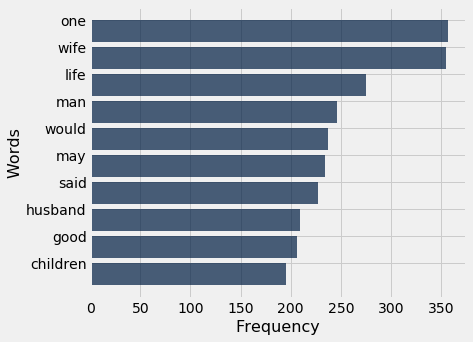

In [97]:
filtered = [w for w in tokens if not w in stopwords.words('english')] 
#NTKL contains stopwords for all major languages

count = Counter(filtered)
most_common_words= [word for word, word_count in Counter(filtered).most_common(10)] #array for most common words
frequency= [word_count for word, word_count in Counter(filtered).most_common(10)] #frequency of the most common words
frequency_table= Table().with_columns('Words', most_common_words, 'Frequency', frequency)
frequency_table.barh('Words', 'Frequency')

## WordCloud generator

Now we use the "WordCloud" library to generate an automatic wordcloud using the most words in the book.

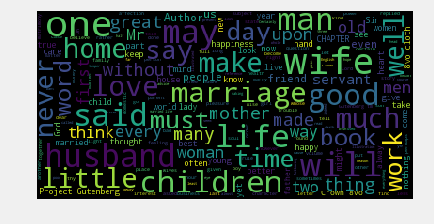

In [99]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
most_common_string=''.join(filtered) #we use the filtered version of the book here (with stopwords removed)
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          max_font_size=40, 
                          random_state=42
                         ).generate(little_women_text) #formatting of the wordcloud

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()